# NBA Draft Analysis 🏀

## Introduction

How do we know if an NBA draft pick will succeed?

The general consensus is that the higher a draft pick, the greater a chance of succeeding in the NBA. But is this really the case? And what are some other factors that may indicate success? For instance, which college program churns out the best prospects?

In this analysis, we will analyze an NBA draft dataset to answer our questions.

The dataset is from [NBA Draft Basketball Player Data 1989-2021 | Kaggle](https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021) and contains data on all NBA Draft picks between the years 1989-2021, including information such as player name, college attended and various game statistics.

## Asking Questions

* Q1: Does higher draft position correlate to better quality of player?

* Q2: Which college produces the most / best NBA talent?

* Q3: Which teams have drafted best?

***

## Data Wrangling

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import CSV and get quick view of dataset
df = pd.read_csv('/Users/pantsu/Downloads/nbaplayersdraft.csv', index_col=0)

df.head()

,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,points,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
id,,,,,,,,,,,,,,,,,,,,,
1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [3]:
#Basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1922 entries, 1 to 1922
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1922 non-null   int64  
 1   rank                       1922 non-null   int64  
 2   overall_pick               1922 non-null   int64  
 3   team                       1922 non-null   object 
 4   player                     1922 non-null   object 
 5   college                    1585 non-null   object 
 6   years_active               1669 non-null   float64
 7   games                      1669 non-null   float64
 8   minutes_played             1669 non-null   float64
 9   points                     1669 non-null   float64
 10  total_rebounds             1669 non-null   float64
 11  assists                    1669 non-null   float64
 12  field_goal_percentage      1665 non-null   float64
 13  3_point_percentage         1545 non-null   float64
 1

In [4]:
#Check for duplicate rows 
df.duplicated().sum()

0

No duplicate rows found.

In [4]:
#Deleting unnecessary columns for our analysis
df = df.drop(df.columns[[1,12,13,14]], axis=1)

#Renaming columns
df = df.rename(columns={'overall_pick': 'pick', 'value_over_replacement': 'VORP', 'total_rebounds': 'rebounds', 
                        'points_per_game': 'PPG', 'average_total_rebounds': 'RPG', 'average_assists': 'APG',
                        'win_shares_per_48_minutes': 'WS/48'})

In [7]:
#Identify null values
df.isnull().sum()

year                        0
pick                        0
team                        0
player                      0
college                   337
years_active              253
games                     253
minutes_played            253
points                    253
rebounds                  253
assists                   253
average_minutes_played    253
PPG                       253
RPG                       253
APG                       253
win_shares                253
WS/48                     254
box_plus_minus            254
VORP                      253
dtype: int64

Data shows existence of null values which will be addressed.

***

## Section 1: How much does draft position actually matter?

We will only be utilizing a subset of this dataset from 1989-2010, so that all players in have opportunity to play out at least 10 years in the league.
<br>
We will also be excluding draft picks 55-60 from the analysis as they were introduced in a later date than 1989, potentially skewing our data.

In [5]:
df = df[(df['year'] < 2011) & (df['pick'] < 55)]

Looking at the dataset's null values, we can see many columns are missing the same amount of data.

Specifically, columns such as 'games', 'points', 'assists', etc are all missing 253 values, likely pointing towards a related issue.

In [9]:
#Create temporary df to examine null values
temp_df = df[df[['years_active']].isnull().all(1)]

temp_df.head()

,year,pick,team,player,college,years_active,games,minutes_played,points,rebounds,assists,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP
id,,,,,,,,,,,,,,,,,,,
42,1989,42,DEN,Michael Cutright,McNeese State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1989,44,PHI,Reggie Cross,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1989,47,DEN,Reggie Turner,UAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1989,48,UTA,Junie Lewis,University of South Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,1989,53,DAL,Jeff Hodge,University of South Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon examination of data, I can conclude that these players have not had any NBA gametime.
Null values such as 'points' will be replaced with 0, as players have not accumulated any stats.

In [6]:
#Replacing null values with 0
df['years_active'].fillna(0, inplace=True)
df['games'].fillna(0, inplace=True)
df['minutes_played'].fillna(0, inplace=True)
df['points'].fillna(0, inplace=True)
df['rebounds'].fillna(0, inplace=True)
df['assists'].fillna(0, inplace=True)
df['PPG'].fillna(0, inplace=True)
df['APG'].fillna(0, inplace=True)
df['RPG'].fillna(0, inplace=True)

In [7]:
#Changing datatype of columns
df['years_active'] = df['years_active'].astype('int')
df['games'] = df['games'].astype('int')
df['points'] = df['points'].astype('int')
df['assists'] = df['assists'].astype('int')
df['rebounds'] = df['rebounds'].astype('int')

### We will be analyzing player performance based on 2 metrics: TOT stats and VORP.

##### 1. TOT stats alludes to a players' career point, assist and rebound total
##### 2. VORP is an all-in-one statistic meant to measure overall player performance throughout career

In [8]:
#Creating calculated field: 'TOT Stats'
df['TOT_stats'] = df['points'] + df['assists'] + df['rebounds']

In [10]:
TOT_stats = df.groupby('pick')['TOT_stats']

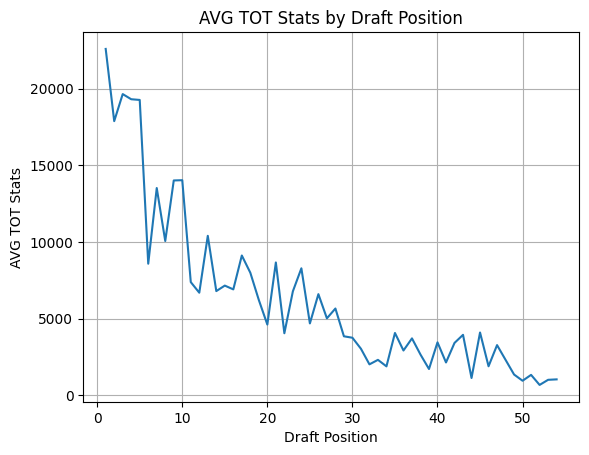

In [11]:
TOT_stats.mean().plot.line(legend=False)

plt.title('AVG TOT Stats by Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('AVG TOT Stats')
plt.grid()
plt.show()

Graph shows us that the #1 pick acculumates the most stats and there is a big dropoff following the top 5.
<br>
Another significant dip when exiting the top 10. 
<br>
Generally speaking, TOT stats decrease as you move down the draft but there is great variability between consecutive picks.
<br>
Better to look at negative relationship in intervals with TOT stats decreasing from picks 10-15 to 16-20, 21-25, etc....
<br>
2nd round (picks 30+) is especially unpredictable with dropoff only being observed at tail end.

In [12]:
df['VORP'].describe()

count    1035.000000
mean        5.790242
std        13.542340
min        -8.500000
25%        -0.500000
50%         0.000000
75%         6.750000
max       142.600000
Name: VORP, dtype: float64

Description showing some outliers especially on the high end.

In [16]:
#Check highest values of VORP for potential outliers being result of insufficient or errant data
df.nlargest(5, columns = 'VORP')

,year,pick,team,player,college,years_active,games,minutes_played,points,rebounds,assists,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP,TOT_stats
id,,,,,,,,,,,,,,,,,,,,
786,2003,1,CLE,LeBron James,NaN,19,1366,52139.0,37062,10210,10045,38.2,27.1,7.5,7.4,249.5,0.230,8.9,142.6,57317
329,1995,5,MIN,Kevin Garnett,NaN,21,1462,50418.0,26071,14662,5445,34.5,17.8,10.0,3.7,191.4,0.182,5.6,96.9,46178
906,2005,4,NOH,Chris Paul,Wake Forest,17,1155,39896.0,20936,5206,10977,34.5,18.1,4.5,9.5,198.9,0.239,7.3,93.7,37119
441,1997,1,SAS,Tim Duncan,Wake Forest,19,1392,47368.0,26496,15091,4225,34.0,19.0,10.8,3.0,206.4,0.209,5.6,91.1,45812
506,1998,9,MIL,Dirk Nowitzki,NaN,21,1522,51368.0,31560,11489,3651,33.8,20.7,7.5,2.4,206.3,0.193,4.5,84.8,46700


Conclude that this is not a case of insufficient data skewing VORP results.

In [24]:
df.nsmallest(5, columns = 'VORP')

,year,pick,team,player,college,years_active,games,minutes_played,points,rebounds,assists,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP,TOT_stats
id,,,,,,,,,,,,,,,,,,,,
498,1998,1,LAC,Michael Olowokandi,University of the Pacific,9,500,13129.0,4135,3414,327,26.3,8.3,6.8,0.7,2.5,0.009,-4.6,-8.5,7876
97,1990,43,SAS,Tony Massenburg,Maryland,13,683,12291.0,4238,2964,266,18.0,6.2,4.3,0.4,15.6,0.061,-4.5,-7.8,7468
60,1990,6,MIN,Felton Spencer,Louisville,12,640,12298.0,3354,3436,213,19.2,5.2,5.4,0.3,20.9,0.081,-4.3,-7.0,7003
89,1990,35,WSB,Greg Foster,Texas-El Paso,13,656,7974.0,2538,1691,351,12.2,3.9,2.6,0.5,5.6,0.033,-5.5,-7.0,4580
689,2001,18,HOU,Jason Collins,Stanford,13,735,14974.0,2621,2706,626,20.4,3.6,3.7,0.9,20.1,0.064,-3.7,-6.5,5953


Consistent pattern here with VORP outliers on lower end also not being result of insufficient data

In [11]:
VORP = df.groupby('pick')['VORP']

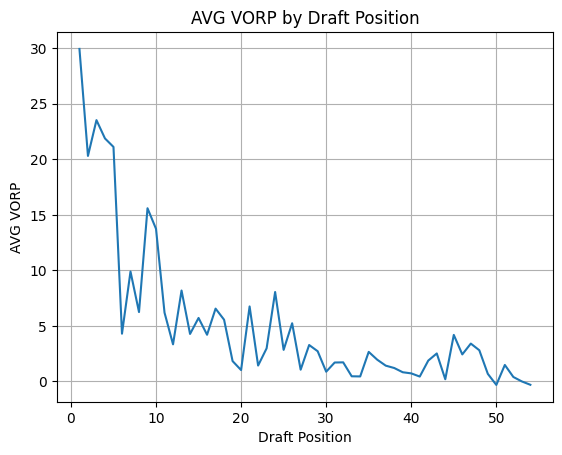

In [12]:
VORP.mean().plot.line(legend=False)

plt.title('AVG VORP by Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('AVG VORP')
plt.grid()
plt.show()

VORP shows similar story to TOT stats, with #1 pick being clear best pick and a big dropoff following the top 5, then top 10.

Steeper decline following top 10 compared to TOT stats, but smaller gap in VORP going forward.
Gap between 10-20 and 20-30 is not as big. 
<br>
2nd round remains essentially a gamble.

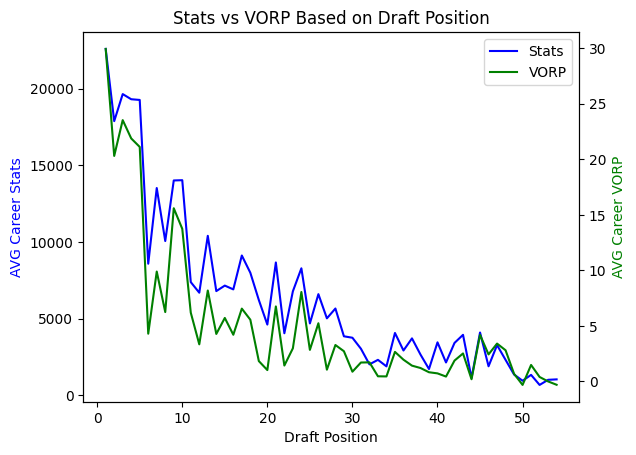

In [28]:
#Displaying AVG career TOT stats and VORP in same graph 
picks = [pick for pick, df in TOT_stats]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(picks, TOT_stats.mean(), 'b', label='Stats')
ax2.plot(picks, VORP.mean(), 'g', label='VORP')
ax1.set_xlabel('Draft Position')
ax1.set_ylabel('AVG TOT Stats', color='b')
ax2.set_ylabel('AVG VORP', color='g')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Stats vs VORP Based on Draft Position')
plt.show()

Graph confirms the correlation seen between TOT stats and VORP, identifying general consistency between our 2 measures for performance.


#### Insights: 
1. General, negative relationship between draft position and player quality
2. No.1 pick produces best quality player
3. Drastic decline following the top 5 with another sizeable dip following top 10
4. Gap in player quality decrease following top 10, with measures dipping slowly with frequent fluctuation
5. Peaks and valleys throughout graph, indicating high variability between consecutive draft picks
6. Unpredictable player quality once reaching 2nd round 

***

## Section 2: Which college is the ultimate NBA talent factory?

In [29]:
#Create temporary DF to assess null values in 'college' column
nocollege = df[df[['college']].isnull().all(1)]

nocollege.head()

,year,pick,team,player,college,years_active,games,minutes_played,points,rebounds,assists,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP,TOT_stats
id,,,,,,,,,,,,,,,,,,,,
26,1989,26,LAL,Vlade Divac,NaN,16,1134,33838.0,13398,9326,3541,29.8,11.8,8.2,3.1,96.4,0.137,2.3,36.3,26265
40,1989,40,BOS,Dino Radja,NaN,4,224,7308.0,3733,1883,356,32.6,16.7,8.4,1.6,14.3,0.094,-0.4,3.0,5972
83,1990,29,CHI,Toni Kukoč,NaN,13,846,22212.0,9810,3555,3119,26.3,11.6,4.2,3.7,59.6,0.129,2.8,27.2,16484
106,1990,52,CLE,Stefano Rusconi,NaN,1,7,30.0,8,6,3,4.3,1.1,0.9,0.4,-0.1,-0.104,-11.4,-0.1,17
159,1991,51,HOU,Žan Tabak,NaN,6,247,3607.0,1233,883,165,14.6,5.0,3.6,0.7,2.4,0.032,-4.9,-2.7,2281


Upon inspection of DF, I can conclude that none of these players entered the NBA draft through college, instead opting for alternate routes such as HS or overseas.
<br>
No need to replace null values.

In [24]:
#Extract the top 20 colleges based on no. of drafted players
player_quantity = df.groupby('college')[['player']].count()
player_quantity = player_quantity.nlargest(10, columns=['player'])

player_quantity.head()

,player
college,
Arizona,29
Duke,29
UCLA,27
UNC,27
Kansas,23


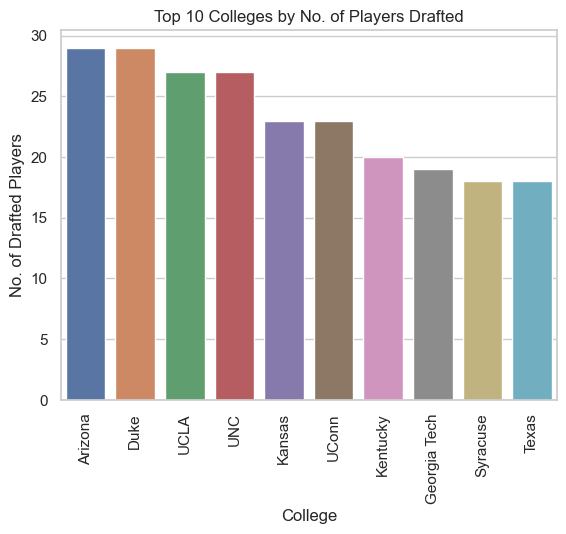

In [25]:
sns.set_theme(style='whitegrid')
sns.barplot(data = player_quantity, x = player_quantity.index, y = player_quantity.player)

plt.title('Top 10 Colleges by No. of Players Drafted')
plt.xlabel('College')
plt.ylabel('No. of Drafted Players')
plt.xticks(rotation='vertical')
plt.show()

Based on graph, Arizona and Duke produced the most Draft alumni with 29 each.
UCLA and UNC close behind with 27 each.

In [26]:
#Calculate avg draft position of players by college 
draft_position = df.groupby('college')['pick'].agg(['count', 'mean'])
draft_position = draft_position[draft_position['count'] > 13]
draft_position = draft_position.nsmallest(10, columns = 'mean')

draft_position.head()

,count,mean
college,,
UNC,27,18.407407
Georgia Tech,19,18.947368
Duke,29,19.517241
Michigan,15,19.933333
Memphis,14,20.785714


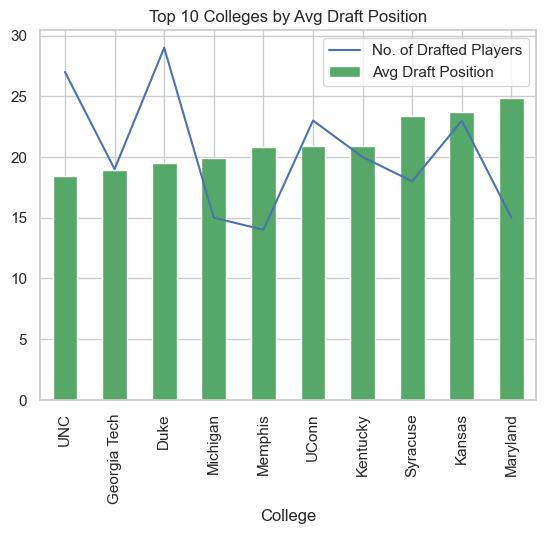

In [27]:
draft_position['count'].plot(kind='line', color='b')
draft_position['mean'].plot(kind='bar', color='g')

plt.title('Top 10 Colleges by Avg Draft Position')
plt.xlabel('College')
plt.legend(['No. of Drafted Players', 'Avg Draft Position'])     
plt.show()

Based on graph, UNC and Duke are neck on neck as the best NBA talent factories when considering both quantity and potential of prospects.

But how did these players actually turn out?

In [73]:
#Top 5 AVG TOT Stats by college
college_stats = df.groupby('college')['TOT_stats'].agg(['count', 'mean'])
college_stats = college_stats[college_stats['count'] > 13]
college_stats = college_stats.nlargest(10, columns = 'mean')

college_stats.loc[:,['mean']].head()

,mean
college,
Michigan,11531.000000
Kentucky,10977.750000
UNC,10480.888889
Georgia Tech,9744.105263
UConn,9213.652174


In [74]:
#Top 5 AVG VORP by college
college_VORP = df.groupby('college')['VORP'].agg(['count', 'mean'])
college_VORP = college_VORP[college_VORP['count'] > 13]
college_VORP = college_VORP.nlargest(10, columns = 'mean')

college_VORP.loc[:,['mean']].head()

,mean
college,
UNC,9.172000
Duke,8.736000
Kentucky,8.578947
Georgia Tech,8.427778
Florida,8.414286


Results show us that UNC is the ultimate basketball program, recording #3 on AVG TOT stats and #1 on AVG VORP.

***

## Section 3: Which teams have drafted most successfully? 

In [9]:
#Extract list of unique teams in dataset
df['team'].unique()

array(['SAC', 'LAC', 'SAS', 'MIA', 'CHH', 'CHI', 'IND', 'DAL', 'WSB',
       'MIN', 'ORL', 'NJN', 'BOS', 'GSW', 'DEN', 'SEA', 'PHI', 'UTA',
       'POR', 'ATL', 'PHO', 'CLE', 'LAL', 'DET', 'MIL', 'NYK', 'HOU',
       'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC'],
      dtype=object)

Notice there are some unfamiliar abbreviations such as VAN 

In [10]:
#Get number of unique teams
df['team'].unique().shape[0]

35

With 30 being the max number of NBA teams, there must be some error in the 'team' column.
Upon research of abbreviations, found these pairings to be of the same organization.

- CHA (Charlotte Bobcats), CHH (Charlotte Hornets) 
- NOH (New Orleans Hornets), NOK (New Orleans / Oklahoma Hornets)
- SEA (Seattle SuperSonics), OKC (Oklahoma Thunder) 
- VAN (Vancouver Grizzlies), MEM (Memphis Grizzlies)
- WSB (Washington Bullets), WAS (Washington Wizards)

In [9]:
#Combining alike organizations together
replace_values = {'CHH':'CHA', 'NOK':'NOH', 'OKC':'SEA', 'VAN':'MEM', 'WSB':'WAS'}
df['team'] = df['team'].replace(replace_values)

In [10]:
team_stats = df.groupby('team')[['TOT_stats']].mean().sort_values('TOT_stats', ascending=False).head(10)

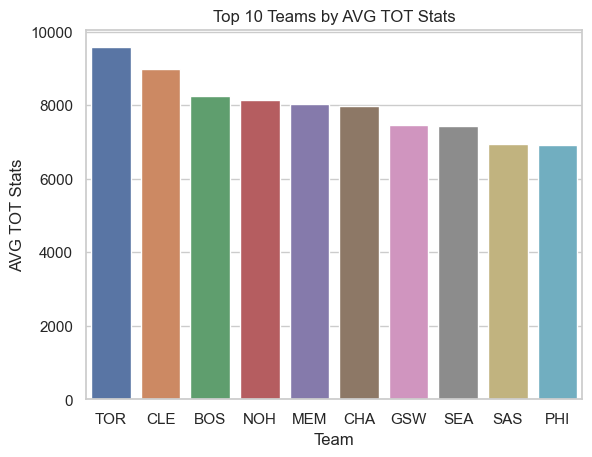

In [11]:
#Graphing the top 10 teams ranked by AVG TOT Stats of players
sns.set_theme(style='whitegrid')
sns.barplot(data = team_stats, x = team_stats.index, y = team_stats.TOT_stats)

plt.title('Top 10 Teams by AVG TOT Stats')
plt.xlabel('Team')
plt.ylabel('AVG TOT Stats')
plt.show()

In [12]:
team_VORP = df.groupby('team')[['VORP']].mean().sort_values('VORP', ascending=False).head(10)

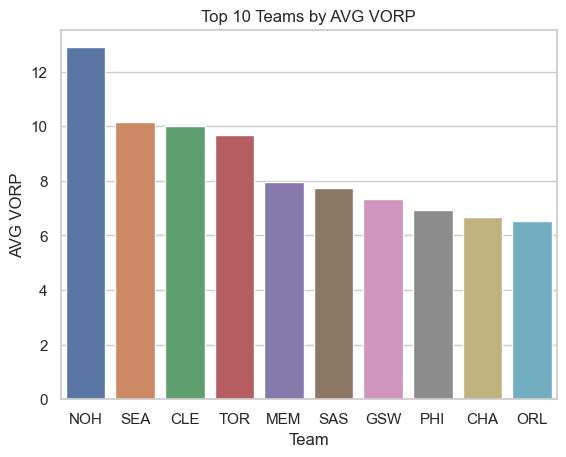

In [13]:
#Graphing the top 10 teams ranked by AVG VORP of players
sns.set_theme(style='whitegrid')
sns.barplot(data = team_VORP, x = team_VORP.index, y = team_VORP.VORP)

plt.title('Top 10 Teams by AVG VORP')
plt.xlabel('Team')
plt.ylabel('AVG VORP')
plt.show()

Looking at both graphs, we can identify TOR, NOH and CLE as the best talent developers in the NBA.

In [21]:
#Extract list of top 10 teams by highest AVG draft position
df.groupby('team')[['pick']].mean().sort_values('pick').head(10)

,pick
team,
TOR,19.458333
LAC,21.733333
CHA,22.485714
MEM,23.121212
BOS,23.527778
ORL,24.142857
NJN,24.512821
GSW,24.956522
NOH,25.000000


Can see that 8/10 teams in list are included in the graphs above, helping strengthen argument that higher draft position leads to better players.
<br>

With NOH and CLE averaging around the 25th pick and TOR averaging the highest pick in dataset with 19.46, it could be argued NOH and CLE are better drafters.
<br>

SEA also deserves mention as team that drafted 2nd overall in AVG VORP and 8th overall in AVG TOT stats while not being in the top 10 of AVG draft positions.